<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [1]:
import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## B. Load and understand the dataset

In [2]:
# put your answer here

df = pd.read_excel("/Users/yscalify/Academics/machine_learning/venv/personality.xlsx")
df.head()


,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Gian Colinares,1,0,1,184,0
1,CJ Alberto,1,0,1,72,1
2,Jerico Lim,0,1,1,94,0
3,Nicole Libunao,0,0,1,34,0
4,Arjay Balboa,1,0,1,81,1


1. Display the summary of all the features of the dataset using `.info()`

In [3]:
# put your answer here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         51 non-null     object
 1   Post/Share Frequently?       51 non-null     int64 
 2   Active in social media?      51 non-null     int64 
 3   Replies to comments?         51 non-null     int64 
 4   Number of friends/followers  51 non-null     int64 
 5   Personality                  51 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [4]:
# put your answer here

df['Personality'].value_counts()

Personality
0    29
1    22
Name: count, dtype: int64

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [5]:
# put your answer here

X = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [6]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [7]:
# put your answer here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[['Kim Namjoon' 1 0 1 1]
 ['Arjay Balboa' 1 0 1 81]
 ['Glyza Bermudez' 0 0 1 14]
 ['Gian Colinares' 1 0 1 184]
 ['Antoine Astilla' 1 1 1 6]
 ['Mark De Luna' 0 0 1 29]
 ['Tati Arellano' 0 1 1 219]
 ['Gerick Samaco' 0 1 1 91]
 ['Jillian Hernandez' 0 1 1 22]
 ['Park  Jimin' 1 1 1 217]
 ['Choi Soobin' 0 0 1 293]
 ['Andres Cruz' 0 1 1 260]
 ['Eliakim Malinana' 0 1 1 145]
 ['Red Padilla' 1 1 1 256]
 ['Mureigne Daet' 1 1 1 135]
 ['Arianna Blas' 0 0 1 281]
 ['Aaron Abad' 1 0 1 269]
 ['Kyle Andaya' 1 0 1 189]
 ['Amor Canoy' 1 1 1 114]
 ['Sakura' 0 1 1 127]
 ['CJ Alberto' 1 0 1 72]
 ['Danyssa Tamayo' 1 0 1 161]
 ['Aaron Chua' 1 1 1 17]
 ['Hong Eunchae' 0 0 1 254]
 ['Kazuha' 1 1 1 175]
 ['Blix Foryasen' 1 1 1 276]
 ['Jannah Cofreros' 0 1 1 176]
 ['Sonya Lee' 0 1 1 267]
 ['Kristel Olaco' 1 1 1 287]
 ['Huening Kai Kamal' 1 1 1 246]
 ['Rafaellah Herrero' 1 1 1 168]
 ['Kim Seokjin' 0 0 1 179]
 ['Jung Hoseok' 0 1 1 14]
 ['Franze Young' 1 1 1 170]
 ['Franze Natividad' 1 0 1 81]
 ['Gwen Lim' 1 0 1 40]
 

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [8]:
# put your answer here

knn = KNeighborsClassifier(n_neighbors=11)

7. Train the model using the `.fit()`

In [9]:
# put your answer here

knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'Kim Namjoon'

8. Test the model using the `.predict()`

In [ ]:
# put your answer here

y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

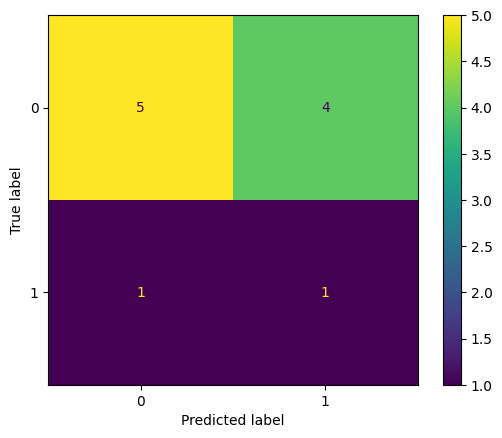

In [ ]:
# put your answer here

conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [ ]:
# put your answer here
sklearn.metrics.accuracy_score(y_test, y_pred)

0.5454545454545454

11. Display the precision

In [ ]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.55555556 0.5       ]


12. Display the recall

In [ ]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.83333333 0.2       ]


13. Display the f1-score

In [ ]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.66666667 0.28571429]


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.50      0.20      0.29         5

    accuracy                           0.55        11
   macro avg       0.53      0.52      0.48        11
weighted avg       0.53      0.55      0.49        11

